# Credit Card Fraud Detection

##### Detecting fraud transactions is of great importance for any credit card company. So, We need to detect potential frauds so that customers are not charged for items that they did not purchase. So the goal is to build a classifier that tells if a transaction is a fraud or not.

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
data = pd.read_csv('creditcard.csv')

#### Print the shape of the data

In [3]:
print(data.shape)

(284807, 31)


#### First 5 entery of the data

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Info of the data 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Summary of the data

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


As you notice, the variable ‘Amount’ ranges from 0 to 25,691.16. To reduce its wide range, we use Standardization to remove the mean and scale to unit variance, so that 68% of the values lie in between (-1, 1).

In [7]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

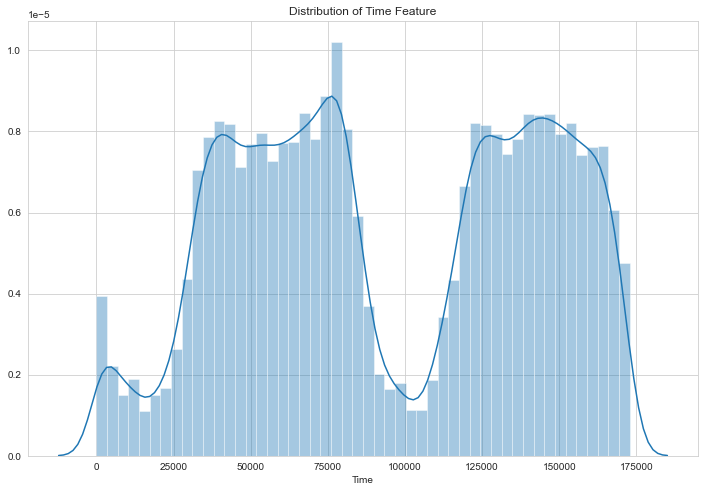

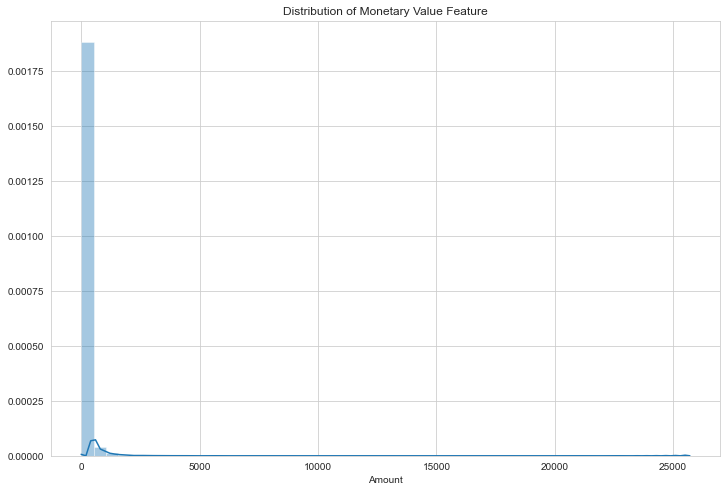

In [8]:
#visualizations of time and amount
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
plt.title('Distribution of Time Feature')
sns.distplot(data.Time)
plt.show()
plt.figure(figsize=(12,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(data.Amount)

In [9]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]  
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

Fraud Cases: 492
Valid Transactions: 284315


In [10]:
# only 0.17% transcations are fraud so data are highly Unbalanced. Let's first apply our model without balancing it
# and if we don't get good accuracy then we can find a way to balance this dataset only if needed. 

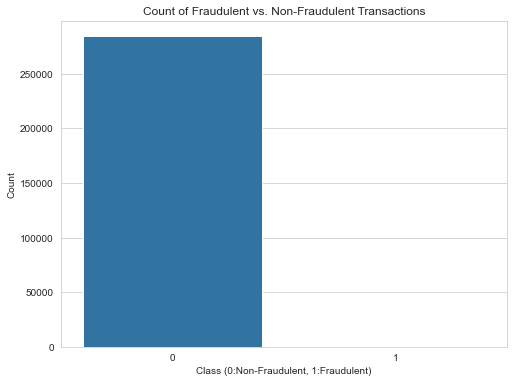

In [11]:
counts = data.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index,y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')
plt.show()

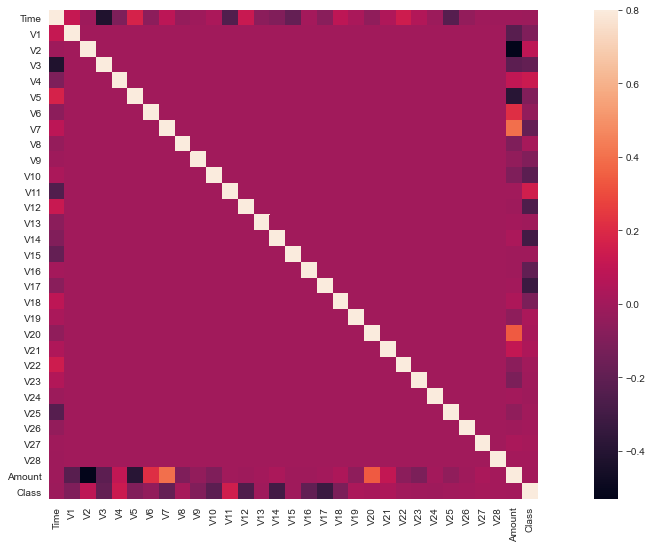

In [12]:
# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize=(20,9))
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [13]:
skew_ = data.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(data[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [15]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(data[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenating newly created columns w original df
df = pd.concat([data, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


### dropping time from training dataset

In [17]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [18]:
# manual train test split using numpy's random.rand
array = np.random.rand(len(df)) < 0.9
train = df[array]
test = df[~array]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256061, 31)
Test Shape: (28746, 31)


In [19]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

#### Creating a subsample data set with balanced class distributions

In [20]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 450 fraudulent transactions in the train data.


In [21]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
188092,0.185048,1.754086,-2.762519,-0.192150,1.559936,-1.597243,1.192533,0.039169,-0.545610,-1.598191,...,0.231872,-0.108688,0.404916,-0.187219,0.541413,0.117099,0.054282,0,-0.350191,0.897218
221744,2.209316,-0.500057,-1.576015,-0.306806,-0.343861,-1.384334,0.085565,-0.488657,-0.661078,0.903663,...,-0.466305,0.167597,0.071701,0.044474,0.674155,-0.078706,-0.074028,0,-0.342075,1.229659
125332,-0.688484,0.221793,0.905957,-3.132575,2.041943,3.517382,-0.090434,0.882966,1.267209,-1.404559,...,-0.040696,-0.438283,1.003612,0.706922,-0.770105,0.193329,-0.091838,0,-0.349231,-0.246880
200719,2.065700,-1.210286,-2.153711,-2.810246,-0.404934,-1.340640,0.078728,-0.469584,0.422183,-0.271165,...,0.144365,-0.095174,-0.439447,0.362380,-0.701416,0.022874,-0.054999,0,0.040822,1.020533
51224,0.799781,-0.686005,0.876798,1.110119,-1.053468,0.098455,-0.511756,0.242956,0.528842,0.074786,...,0.223074,-0.213972,-0.031085,0.243136,-0.374796,0.015852,0.056336,0,0.414403,-0.993510


In [23]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

900

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.782845,0.368745,2.491474,1.601648,-0.417058,1.017225,0.366164,0.020070,0.037205,0.038884,...,0.822213,-0.074362,-0.260301,0.212852,0.066400,-0.051980,-0.187419,0,0.042581,-1.440443
1,1.183703,0.306221,0.264077,1.073882,-0.070720,-0.488475,0.169703,-0.111308,-0.060025,-0.040701,...,0.256815,-0.080445,0.093816,0.619853,-0.300535,0.030134,0.019082,0,-0.299295,-0.609392
2,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,-16.601197,...,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,1,-0.318686,0.048584
3,-1.572200,-0.701301,0.511534,-0.862446,0.263180,-0.262617,-0.341091,0.518395,-1.389271,0.053214,...,-0.355081,-0.108576,-0.266942,-0.672116,0.078107,-0.004930,-0.035108,0,-0.129337,-0.597705
4,-1.452337,-0.466853,-0.555007,-3.355574,2.117199,3.431942,-0.538528,1.577375,0.787465,-1.671112,...,0.572263,0.028159,0.761226,-0.097191,0.546707,0.198838,0.055341,0,0.006598,0.555279
5,1.200327,-0.102074,0.548792,0.574167,-0.670535,-0.654230,-0.094458,-0.150529,0.639448,-0.327393,...,-0.000334,-0.104731,0.484101,0.548662,0.667331,-0.034178,0.011665,0,-0.241963,-0.516127
6,-1.201791,1.147915,0.197853,-1.292503,0.981777,-0.860087,1.046019,-0.154584,0.379192,0.037530,...,-0.865785,-0.262416,-0.728547,-0.006780,0.156053,0.426311,0.287078,0,-0.297296,0.735683
7,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,-4.170623,...,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,1,0.102233,-0.761704
8,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,-4.363102,...,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,1,-0.265112,0.158022
9,1.453906,-1.070162,0.292760,-1.562809,-1.160185,-0.044738,-1.107004,0.065961,-2.062027,1.570224,...,-0.071468,0.012427,-0.323025,0.322450,-0.173772,0.040816,0.004056,0,-0.293258,-0.427578


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

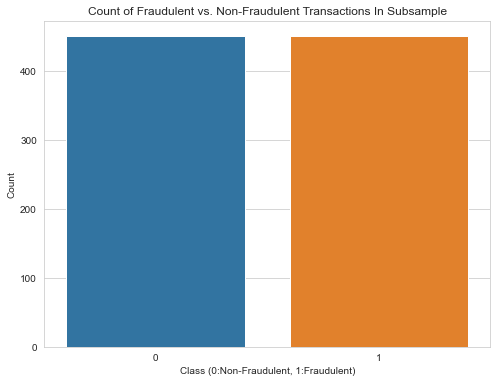

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.445592
V2,0.503256
V3,-0.565696
V4,0.715353
V5,-0.376530
V6,-0.406112
V7,-0.478351
V8,0.057583
V9,-0.545179
V10,-0.629005


In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.565696
V9,-0.545179
V10,-0.629005
V12,-0.684162
V14,-0.750011
V16,-0.601543
V17,-0.566568


In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V2,0.503256
V4,0.715353
V11,0.688081
Class,1.000000


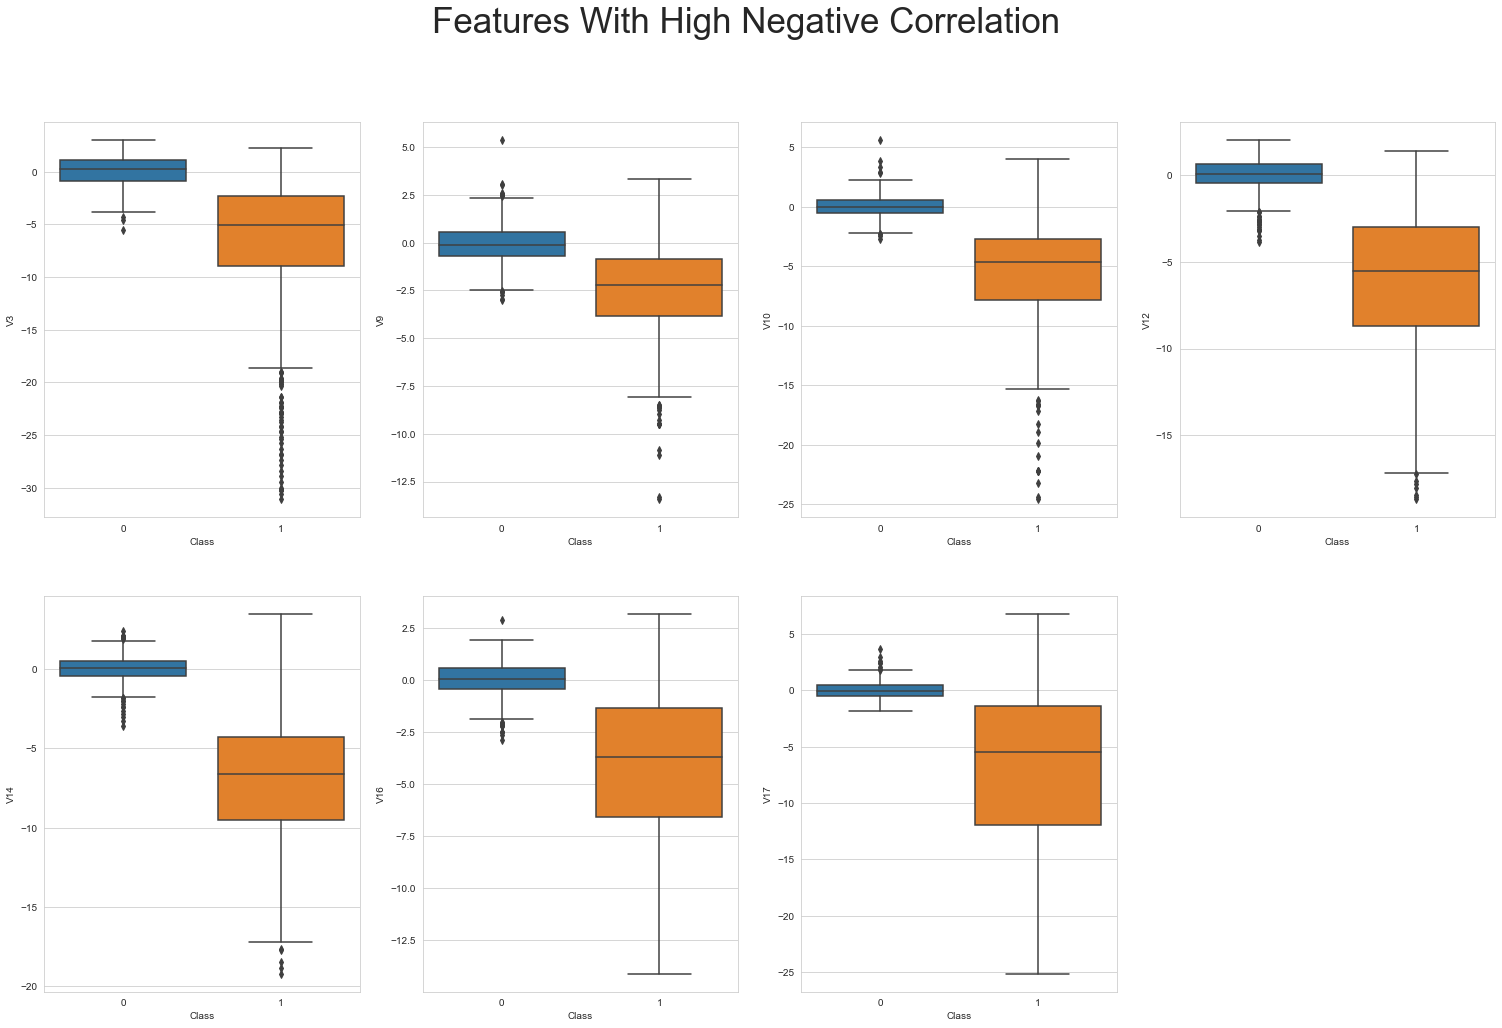

In [30]:
#visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

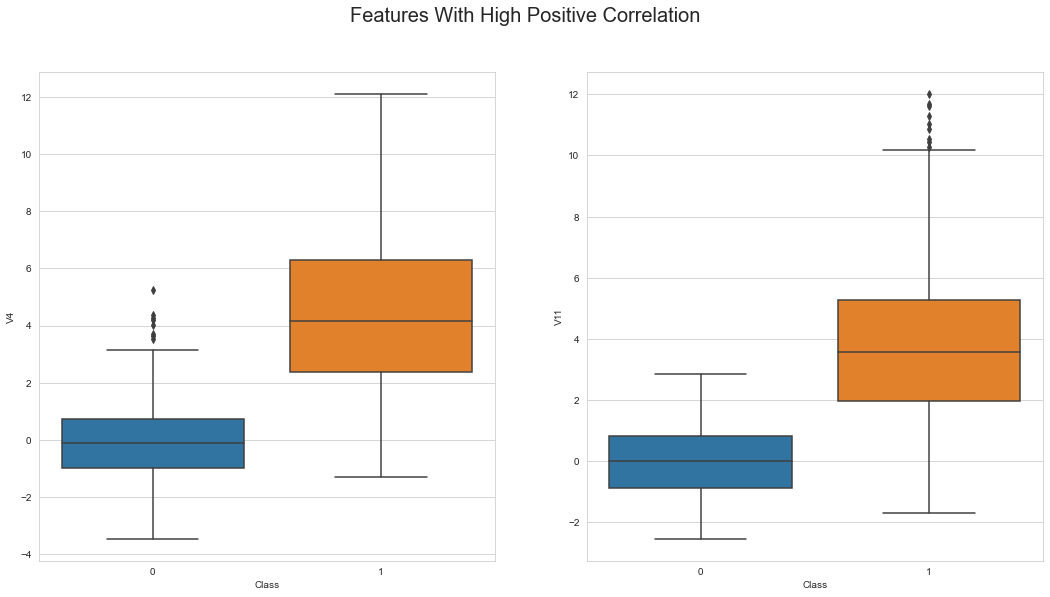

In [31]:
#visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

#### Extreme Outlier Remove

In [32]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) | (subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [33]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 900 transactions by 258 transactions to 642 transactions.


#### Dimensionality Reduction

In [34]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [35]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

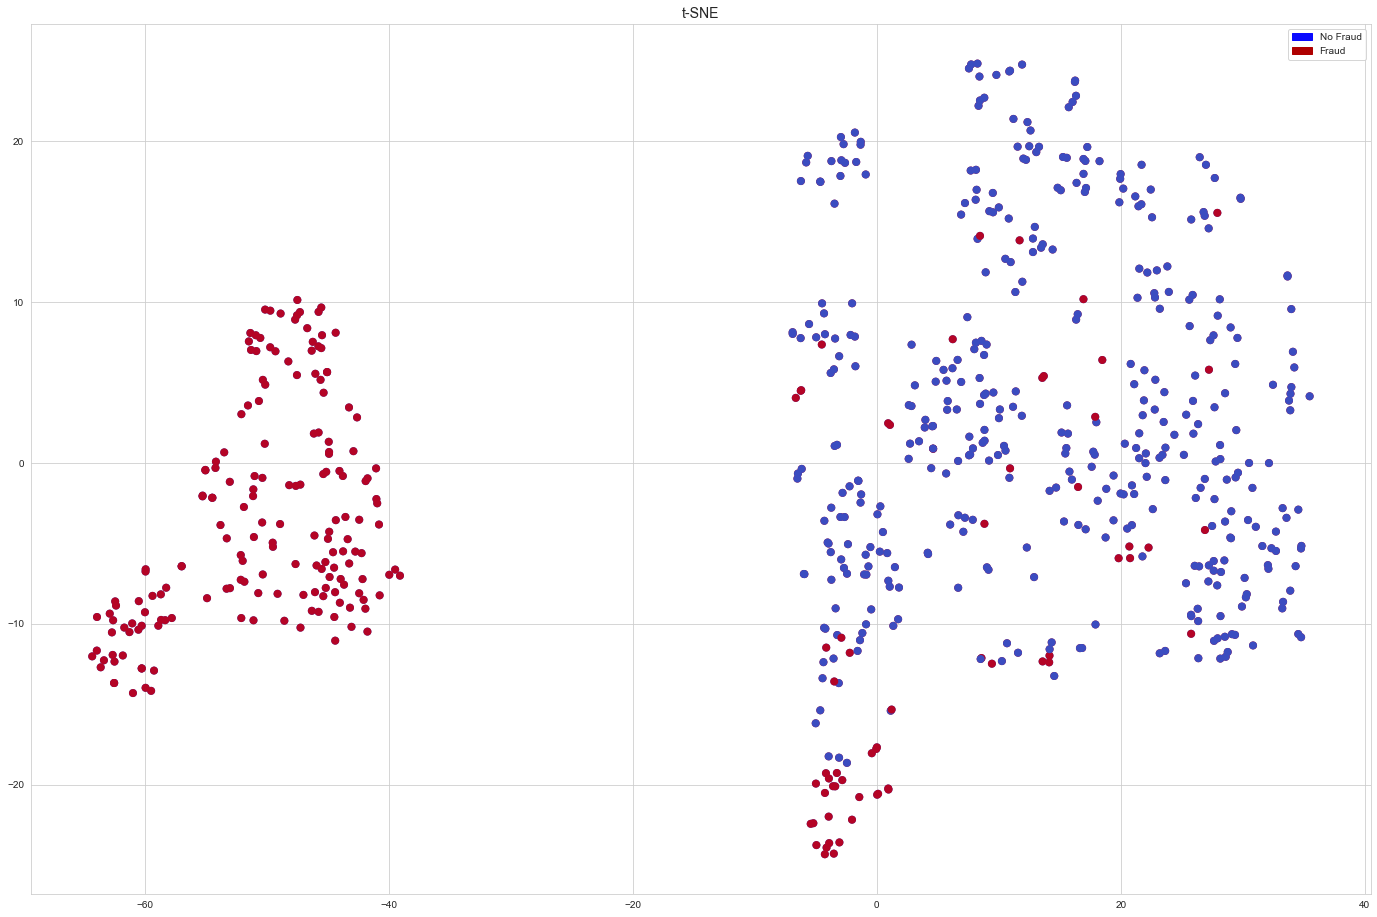

In [36]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


In [37]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [38]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [40]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (513, 30) (129, 30) 

Y_shapes:
 Y_train: Y_validation:
 (513,) (129,)


## Model-1

This model will be build on pure balanced dataset which created above

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971459 (0.023107)
LDA: 0.969303 (0.029109)
KNN: 0.959158 (0.026602)
CART: 0.902866 (0.030154)
SVM: 0.969498 (0.027086)
XGB: 0.967676 (0.031231)
RF: 0.969510 (0.025965)


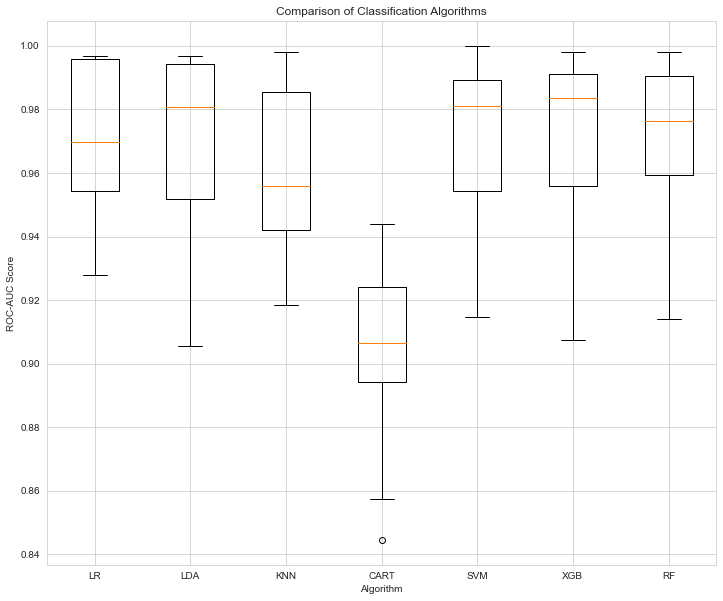

In [43]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## Model 2

**Classification Algorithms**

In [44]:
X = df.drop('Class',axis=1)
y = df['Class']

In [45]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(X, y)

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (568630, 30)
Size of y-sample : (568630, 1)


In [46]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split( 
        x_sample, y_sample, test_size = 0.2, random_state = 42)

In [47]:
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 454904
Length of X_test is: 113726
Length of y_train is: 454904
Length of y_test is: 113726


### DNN Model Building

##### Here we will build a 5-layer deep neural networking using the Sequential model in Keras.

In [48]:
from tensorflow.keras import layers,Sequential

model = Sequential([
    layers.Dense(input_dim = 30, units = 16, activation = 'relu'),
    layers.Dense(units = 24, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(units = 20, activation = 'relu'),
    layers.Dense(units = 24, activation = 'relu'),
    layers.Dense(units =1, activation = 'sigmoid')])

#### With the model architecture built, let’s compile and train the model.

In [49]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
30327/30327 [==============================] - 42s 1ms/step - loss: 0.0436 - accuracy: 0.9846
Epoch 2/5
30327/30327 [==============================] - 39s 1ms/step - loss: 0.0192 - accuracy: 0.9946
Epoch 3/5
30327/30327 [==============================] - 39s 1ms/step - loss: 0.0158 - accuracy: 0.9958
Epoch 4/5
30327/30327 [==============================] - 38s 1ms/step - loss: 0.0140 - accuracy: 0.9963
Epoch 5/5
30327/30327 [==============================] - 40s 1ms/step - loss: 0.0131 - accuracy: 0.9968


In [50]:
score = model.evaluate(X_test,y_test)
print(score)

3554/3554 [==============================] - 4s 1ms/step - loss: 0.0090 - accuracy: 0.9980
[0.008958921767771244, 0.9980303645133972]


## RANDOM FOREST

In [51]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=100) 
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = rfc.predict(X_test)

### Decision Tree

##### Now let’s build a decision tree model.

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [61]:
# predictions 
yPred = rfc.predict(X_test) 
print(yPred)

[1 1 0 ... 1 1 0]


In [62]:
yPred = yPred.reshape(-1,1)
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) 
n_errors = (yPred != y_test).sum() 
print("The model used is Random Forest classifier") 

acc = accuracy_score(y_test, yPred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(y_test, yPred) 
print("The precision is {}".format(prec)) 

rec = recall_score(y_test, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(y_test, yPred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(y_test, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9999120693596891
The precision is 0.999824518302741
The recall is 1.0
The F1-Score is 0.9999122514522385
The Matthews correlation coefficient is0.9998241534244318


In [63]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

lgb_pred = lgb.predict(X_test)

print("Training Accuracy :", lgb.score(X_train, y_train))

Training Accuracy : 0.9994504334980567


In [64]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, yPred) 

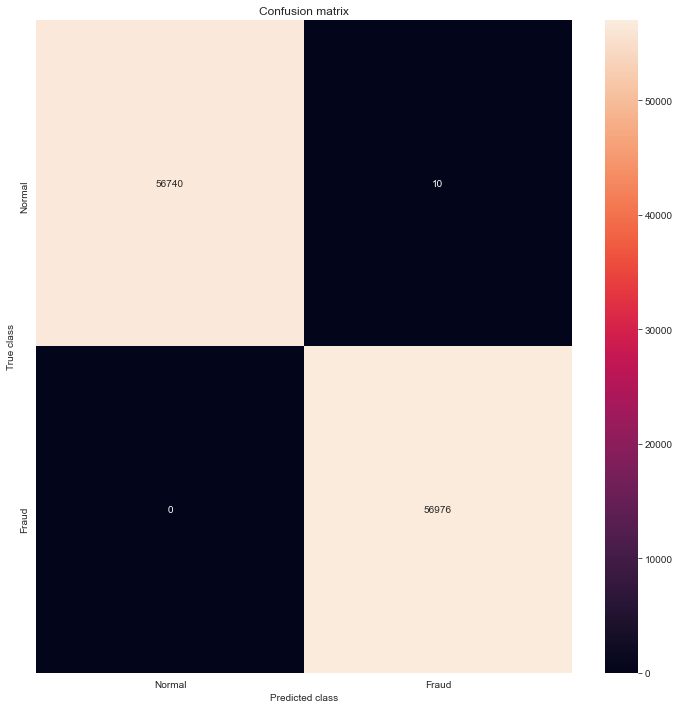

In [65]:
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 